In [1]:
import tensorflow as tf
import pandas as pd
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

In [6]:
IMAGE_SIZE = [224,224]

train_path = 'PlantVillage/train'
valid_path = 'PlantVillage/valid'

## Inception V3

In [4]:
inception = InceptionV3(input_shape = IMAGE_SIZE + [3] , weights='imagenet' ,include_top=False)

In [5]:
for layers in inception.layers:
    layers.trainable = False

In [12]:
folders = glob('PlantVillage/train/*')
folders

['PlantVillage/train\\Potato___Early_blight',
 'PlantVillage/train\\Potato___healthy',
 'PlantVillage/train\\Potato___Late_blight']

In [13]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [15]:
model = Model(inputs=inception.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
training_set = train_datagen.flow_from_directory('PlantVillage/train',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 1752 images belonging to 3 classes.


In [23]:
test_set = test_datagen.flow_from_directory('PlantVillage/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 435 images belonging to 3 classes.


In [27]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch= len(training_set),
    validation_steps=len(test_set),
)

C:\Users\Adil\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
55/55 [==============================] - 85s 1s/step - loss: 2.7147 - accuracy: 0.7660 - val_loss: 0.6353 - val_accuracy: 0.8989
Epoch 2/10
55/55 [==============================] - 65s 1s/step - loss: 0.4659 - accuracy: 0.9132 - val_loss: 0.4346 - val_accuracy: 0.9402
Epoch 3/10
55/55 [==============================] - 65s 1s/step - loss: 0.3060 - accuracy: 0.9384 - val_loss: 0.5214 - val_accuracy: 0.9287
Epoch 4/10
55/55 [==============================] - 66s 1s/step - loss: 0.2456 - accuracy: 0.9475 - val_loss: 0.3780 - val_accuracy: 0.9448
Epoch 5/10
55/55 [==============================] - 69s 1s/step - loss: 0.3153 - accuracy: 0.9412 - val_loss: 0.5508 - val_accuracy: 0.9126
Epoch 6/10
55/55 [==============================] - 70s 1s/step - loss: 0.3293 - accuracy: 0.9389 - val_loss: 0.6093 - val_accuracy: 0.9195
Epoch 7/10
55/55 [==============================] - 77s 1s/step - loss: 0.1869 - accuracy: 0.9629 - val_loss: 0.4668 - val_accuracy: 0.9494
Epoch 8/10
55/55 [==

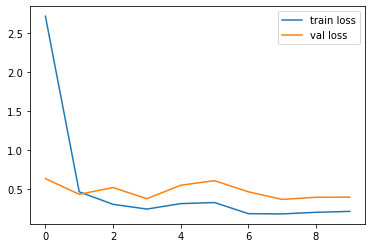

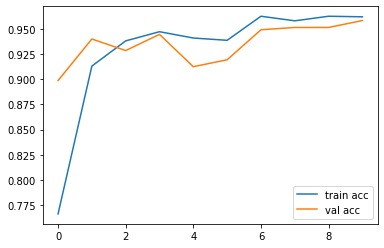

<Figure size 432x288 with 0 Axes>

In [30]:
#Loss
plt.plot(r.history['loss'] , label='train loss')
plt.plot(r.history['val_loss'] , label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Accurcay
plt.plot(r.history['accuracy'] , label='train acc')
plt.plot(r.history['val_accuracy'] , label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')


In [31]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [32]:
y_pred = model.predict(test_set)
y_pred

array([[1.0000000e+00, 1.0037671e-25, 0.0000000e+00],
       [1.8409999e-09, 1.0000000e+00, 4.5418902e-16],
       [1.0000000e+00, 2.2021642e-14, 6.4359704e-33],
       ...,
       [6.4382344e-09, 1.0000000e+00, 1.6167383e-24],
       [1.0000000e+00, 4.5476971e-24, 2.5757423e-35],
       [1.0000000e+00, 2.2513088e-23, 0.0000000e+00]], dtype=float32)

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,